In [1]:
import numpy as np
import matplotlib.pyplot as plt
from torchvision import utils
import h5py
import glob
import os

In [15]:
plt.style.use('dark_background')

In [22]:
params = {
    'axes.labelsize': 10,
    'legend.fontsize': 10,
    'xtick.labelsize': 9,
    'ytick.labelsize': 9,
    'text.usetex': False,
    'figure.figsize': [4.5, 4.5],
    #----------
    'xtick.direction': 'in',
    'ytick.direction': 'in',
    'image.cmap': 'jet',
    'legend.frameon':  False,
    'xtick.top': False,
    'ytick.right': False,
    #----------
    'lines.linewidth': 2.0,
#    'axes.labelsize': 12,
    'xtick.minor.visible': False,
    'ytick.minor.visible': False,
    'xtick.major.top': False, 
    'xtick.major.bottom': False, 
    'ytick.major.left': False, 
    'ytick.major.right': False,
   }
plt.rcParams.update(params)

In [4]:
#DirBase = "/data/inspur_disk03/userdir/wangcx/BASS_stack/area2/strong_w3"
DirBase ="/data/inspur_disk03/userdir/wangcx/BASS_stack/area2/DEV_COMP_hdf5"
OutBase = ""
data_shape = [101,101,3]

### load data

In [5]:
fps = glob.glob(os.path.join(DirBase,'*.hdf5'))

In [6]:
def preprocess(x, sigma=100):
    x -= x.min()
    x /= x.max()
    return x

In [7]:
def readdata(file, key):
    with h5py.File(file, 'r') as fp:
        image = fp[key]
        datar = image['r'][...]
        datag = image['g'][...]
        dataz = image['z'][...]
    datar = preprocess(datar)
    datag = preprocess(datag)
    dataz = preprocess(dataz)
    data = np.stack([datar, datag, dataz])
    return data

### data clean and visualization

In [8]:
def color_F(x, beta=1.):
    return np.arcsinh(x/beta)

In [9]:
def color_f(x, m, M, beta):
    bool_min = x < m
    bool_max = x > M
    fx = color_F(x-m, beta)/color_F(M-m, beta)
    fx[bool_min] = 0.
    fx[bool_max] = 1.
    return fx

In [10]:
def show_color(r, g, z, m, M, beta):
    I = (r+g+z)/3.
    bool_I = I == 0
    I[bool_I] = 1
    RGB = [c*color_f(I, m, M, beta)/I for c in [r, g, z]]
    RGB[0][bool_I] = 0.
    RGB[1][bool_I] = 0.
    RGB[2][bool_I] = 0.
    RGB = np.stack(RGB)
    RGB_max = np.max(RGB, axis=0)
    RGB_max[RGB_max < 1] = 1.
    RGB /= RGB_max[None,:]*np.ones(RGB.shape)
    return RGB

### show

In [11]:
data = readdata(fps[0],'87599020487')

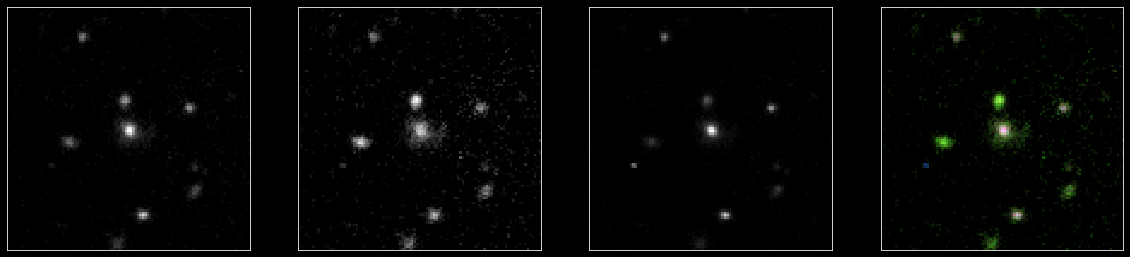

In [49]:
cmap = 'gray'
fig, axes = plt.subplots(1,4,figsize=(20,5))
im = show_color(data[0], data[1], data[2], m=0.15, M=1., beta=0.3)
axes[0].imshow(im[0],cmap=cmap)
axes[1].imshow(im[1],cmap=cmap)
axes[2].imshow(im[2],cmap=cmap)
axes[3].imshow(im.transpose(1,2,0))
fig.show()